In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
scaler=StandardScaler()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
from sklearn.metrics import confusion_matrix,accuracy_score
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Data Importing

In [88]:
data=pd.read_csv("C:\\Users\\Karan\\Desktop\\DBS Casual Assessments\\BankCustomers.csv").iloc[:,3:]
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [89]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [90]:
x1=pd.get_dummies(data["Geography"],drop_first=True)
x2=pd.get_dummies(data["Gender"],drop_first=True)
data=pd.concat([data,x1,x2],axis=1).drop(columns=["Geography","Gender"])

In [91]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [92]:
for i in data[['CreditScore', 'Age','Balance', 'EstimatedSalary',]]:
    data[i]=scaler.fit_transform(data[[i]])

In [93]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,5,-1.225848,2,1,0,-0.066419,0,0,0,1
9996,-1.391939,-0.373958,10,-0.306379,1,1,1,0.027988,0,0,0,1
9997,0.604988,-0.278604,7,-1.225848,1,0,1,-1.008643,1,0,0,0
9998,1.256835,0.293517,3,-0.022608,2,1,0,-0.125231,1,1,0,1


In [94]:
X=data.drop(columns=["Exited"],axis=1)
X
y=data["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Oversampling on Training Data

In [96]:
ros=RandomOverSampler(sampling_strategy='minority')
X_train_reshape,y_train_reshape=ros.fit_resample(X,y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
rfc.fit(X_train_reshape,y_train_reshape)

RandomForestClassifier()

In [99]:
rfc_pred=rfc.predict(X_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
accuracy_score(y_test,rfc_pred)

1.0

In [101]:
print(y_test.shape)

(3000,)


In [102]:
rfc.fit(X_test,y_test)

RandomForestClassifier()

In [103]:
rfc_pred_new=rfc.predict(X_train_reshape)
rfc_pred_new

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [105]:
accuracy_score(y_train_reshape,rfc_pred_new)

0.7888358658796936

In [114]:
import statsmodels.api as sms
X_reshape=sms.add_constant(X_train_reshape)
model=sms.GLM(y_train_reshape,X_train_reshape,family=sms.families.Binomial())
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                15926
Model:                            GLM   Df Residuals:                    15915
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9192.0
Date:                Tue, 25 Oct 2022   Deviance:                       18384.
Time:                        15:41:24   Pearson chi2:                 1.66e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0770      0.018     -4.340      0.000      -0.112      -0.042
Age                 0.8428      0.020     42.202      0.000       0.804       0.882
Tenure              0.0037      0.005      0.669      0.504      -0.007       0.014
Balance             0.1760      0.020      8.759      0.000       0.137       0.215
NumOfProducts       0.0224      0.022      1.026      0.305      -0.020       0.065
HasCrCard           0.1050      0.036      2.930      0.003       0.035       0.175
IsActiveMember     -0.8626      0.035    -24.353      0.000      -0.932      -0.793
EstimatedSalary     0.0342      0.018      1.909      0.056      -0.001       0.069
Germany             0.8593      0.045     19.228      0.000       0.772       0.947
Spain               0.1619      0.044      3.713      0.000       0.076       0.247
Male               -0.4827      0.035    -13.979      0.000      -0.550      -0.415
===================================================================================
"""

# New Exercise

In [9]:
bank=pd.read_csv('C:/Users/Karan/Desktop/Data/BankCustomers.csv').iloc[:,3:]
bank

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
bank.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
bank['Geography']=le.fit_transform(bank['Geography'])
bank['Gender']=le.fit_transform(bank['Gender'])

In [28]:
X=bank.drop(columns=["Exited"])
X
y=bank['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [38]:
bank.columns
for i in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    X[i]=le.fit_transform(X[i])

In [39]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,228,0,0,24,2,0,1,1,1,5068
1,217,2,0,23,1,743,1,0,1,5639
2,111,0,0,24,8,5793,3,1,0,5707
3,308,0,0,21,1,0,2,0,0,4704
4,459,2,0,25,2,3696,1,1,1,3925
...,...,...,...,...,...,...,...,...,...,...
9995,380,0,1,21,5,0,2,1,0,4827
9996,125,0,1,17,10,124,1,1,1,5087
9997,318,0,0,18,7,0,1,0,1,2062
9998,381,1,1,24,3,427,2,1,0,4639


In [43]:
X["CreditScore"]=scaler.fit_transform(X[['CreditScore']])
X["Age"]=scaler.fit_transform(X[["Age"]])
X["Balance"]=scaler.fit_transform(X[["Balance"]])
X["EstimatedSalary"]=scaler.fit_transform(X[["EstimatedSalary"]])

In [44]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.327331,0,0,0.293793,2,-0.958432,1,1,1,0.024035
1,-0.441331,2,0,0.198387,1,-0.608805,1,0,1,0.221848
2,-1.539876,0,0,0.293793,8,1.767524,3,1,0,0.245405
3,0.501759,0,0,0.007575,1,-0.958432,2,0,0,-0.102066
4,2.066668,2,0,0.389199,2,0.780759,1,1,1,-0.371937
...,...,...,...,...,...,...,...,...,...,...
9995,1.247941,0,1,0.007575,5,-0.958432,2,1,0,-0.059455
9996,-1.394785,0,1,-0.374048,10,-0.900082,1,1,1,0.030617
9997,0.605396,0,0,-0.278642,7,-0.958432,1,0,1,-1.017340
9998,1.258304,1,1,0.293793,3,-0.757502,2,1,0,-0.124584


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
ros=RandomOverSampler(sampling_strategy='minority')
X_train_reshape,y_train_reshape=ros.fit_resample(X_train,y_train)

In [55]:
rfc.fit(X_train_reshape,y_train_reshape)
pred_rfc=rfc.predict(X_test)
pred_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
accuracy_score(y_test,pred_rfc)

0.859

In [59]:
log.fit(X_train_reshape,y_train_reshape)
pred_log=log.predict(X_test)
pred_log

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [63]:
accuracy_score(y_test,pred_log)

0.7013333333333334

In [75]:
x1=pd.DataFrame(rfc.feature_importances_,columns=["Scores"])
x2=pd.DataFrame(X.columns,columns=["Names"])
pd.concat([x1,x2],axis=1).sort_values('Scores',ascending=False).reset_index().drop(columns=['index'])

,Scores,Names
0,0.261718,Age
1,0.142034,EstimatedSalary
2,0.138338,Balance
3,0.134184,CreditScore
4,0.124708,NumOfProducts
5,0.080980,Tenure
6,0.039783,Geography
7,0.039377,IsActiveMember
8,0.020005,Gender
9,0.018875,HasCrCard


In [76]:
import statsmodels.api as sms
X_reshape=sms.add_constant(X_train_reshape)
model=sms.GLM(y_train_reshape,X_train_reshape,family=sms.families.Binomial())
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                11094
Model:                            GLM   Df Residuals:                    11084
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6574.7
Date:                Sun, 30 Oct 2022   Deviance:                       13149.
Time:                        15:49:12   Pearson chi2:                 1.15e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0738      0.021     -3.526      0.000      -0.115      -0.033
Geography           0.1699      0.025      6.669      0.000       0.120       0.220
Gender             -0.4522      0.041    -11.146      0.000      -0.532      -0.373
Age                 0.8228      0.023     35.053      0.000       0.777       0.869
Tenure              0.0106      0.007      1.635      0.102      -0.002       0.023
Balance             0.2606      0.021     12.293      0.000       0.219       0.302
NumOfProducts       0.0817      0.026      3.163      0.002       0.031       0.132
HasCrCard           0.1130      0.042      2.685      0.007       0.031       0.195
IsActiveMember     -0.8365      0.042    -20.020      0.000      -0.918      -0.755
EstimatedSalary     0.0086      0.021      0.406      0.685      -0.033       0.050
===================================================================================
"""

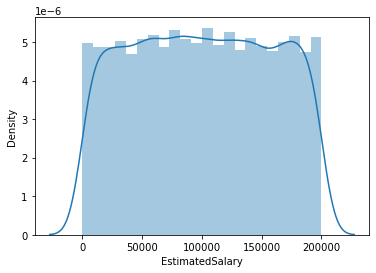

In [92]:
import seaborn as sns
sns.distplot(bank['EstimatedSalary']);